In [1]:
import numpy as np
import pickle
import scipy.ndimage
import matplotlib.pyplot as plt
import math
import fceulib
import networkx as nx
import nxpd
import sets
# TODO: UnionFind, probably via import

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: DeprecationWarning: the sets module is deprecated


In [2]:
"""UnionFind.py

Union-find data structure. Based on Josiah Carlson's code,
http://aspn.activestate.com/ASPN/Cookbook/Python/Recipe/215912
with significant additional changes by D. Eppstein.
"""

class UnionFind:
    """Union-find data structure.

    Each unionFind instance X maintains a family of disjoint sets of
    hashable objects, supporting the following two methods:

    - X[item] returns a name for the set containing the given item.
      Each set is named by an arbitrarily-chosen one of its members; as
      long as the set remains unchanged it will keep the same name. If
      the item is not yet part of a set in X, a new singleton set is
      created for it.

    - X.union(item1, item2, ...) merges the sets containing each item
      into a single larger set.  If any item is not yet part of a set
      in X, it is added to X as one of the members of the merged set.
    """

    def __init__(self):
        """Create a new empty union-find structure."""
        self.weights = {}
        self.parents = {}

    def __getitem__(self, object):
        """Find and return the name of the set containing the object."""

        # check for previously unknown object
        if object not in self.parents:
            self.parents[object] = object
            self.weights[object] = 1
            return object

        # find path of objects leading to the root
        path = [object]
        root = self.parents[object]
        while root != path[-1]:
            path.append(root)
            root = self.parents[root]

        # compress the path and return
        for ancestor in path:
            self.parents[ancestor] = root
        return root
        
    def __iter__(self):
        """Iterate through all items ever found or unioned by this structure."""
        return iter(self.parents)

    def union(self, *objects):
        """Find the sets containing the objects and merge them all."""
        roots = [self[x] for x in objects]
        heaviest = max([(self.weights[r],r) for r in roots])[1]
        for r in roots:
            if r != heaviest:
                self.weights[heaviest] += self.weights[r]
                self.parents[r] = heaviest

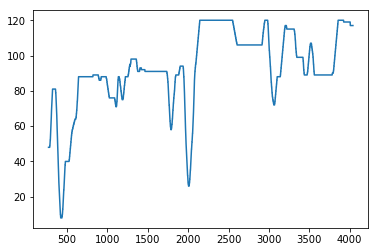

In [3]:
inputVec = fceulib.readInputs('movie.fm2')
collisions = pickle.load(open('collisions.pkl'))

(modes, path, merged, unions, track, all_times,merged_params) = pickle.load(open("modes.pkl"))

plt.plot(track[:,0],track[:,1])

plt.show()
# TODO: define axis elsewhere?
axis = 2
velocities = track[1:,axis]-track[:-1,axis] 

In [4]:
start_time = track[0,0]
transitions = {}

for u in unions:
    print u, unions[u]
# Edges into [outer] from [inner]
entries_from = {m: {m: [] for m in merged} 
                for m in merged}
# Edges into [outer]
entries = {m: [] for m in merged}
for t in range(1,len(path)):
    if t == 0:
        prev = -1
    else:
        prev = unions[t-1]
    start = all_times[path[t][1][0]]
    
    entries_from[unions[t]][prev].append(start)
    entries[unions[t]].append(start)
    transitions[start] = (prev,unions[t])
    #print (path[t][1][0],start),":",prev,"->",unions[t],"\n",path[unions[t]][1][2][0],path[unions[t]][1][2][1].params

0 4
1 5
2 20
3 7
4 4
5 5
6 20
7 7
8 4
9 5
10 4
11 5
12 4
13 5
14 4
15 5
16 4
17 5
18 4
19 5
20 20
21 7
22 4
23 5
24 4
25 5
26 20
27 7
28 4
29 5
30 20
31 7
32 4
33 5
34 20
35 7
36 112
37 4
38 53
39 20
40 4
41 4
42 5
43 4
44 5
45 20
46 4
47 5
48 4
49 5
50 20
51 7
52 4
53 53
54 20
55 4
56 5
57 4
58 5
59 4
60 5
61 4
62 5
63 4
64 53
65 20
66 4
67 53
68 20
69 4
70 5
71 4
72 5
73 4
74 5
75 20
76 7
77 4
78 53
79 20
80 4
81 53
82 20
83 4
84 5
85 4
86 5
87 20
88 4
89 5
90 20
91 7
92 4
93 5
94 7
95 4
96 5
97 20
98 4
99 5
100 7
101 4
102 5
103 7
104 5
105 7
106 106
107 4
108 5
109 4
110 4
111 20
112 112
113 112
114 4
115 5
116 4
117 5
118 112
119 7
120 4
121 5
122 7
123 4
124 5
125 4
126 5
127 20
128 4
129 5
130 4
131 5
132 20
133 7
134 4
135 5
136 4
137 5
138 20
139 7
140 4
141 5
142 7
143 4
144 5
145 4
146 5
147 20
148 4
149 5
150 20
151 4
152 4
153 5
154 20
155 7
156 112
157 4
158 5
159 20
160 112
161 4
162 5
163 4
164 53
165 20
166 4
167 53
168 20
169 4
170 5
171 4
172 4
173 4
174 112
175 7
17

{4: 66, 5: 53, 7: 22, 106: 1, 112: 8, 20: 31, 53: 8, 190: 1}
4 {'type': 'c0'}
5 {'acc': 0.20220442411903655, 'type': 'accN', 'N': -4.3650757533487621}
7 {'type': 'cN', 'N': 4.0457516339869297}
106 {'acc': 0.375494071146245, 'type': 'accN', 'N': -3.9999999999999991}
112 {'acc': 0.40980323698461807, 'type': 'accN', 'N': -3.3671038323646187}
20 {'acc': 0.27396588904136449, 'type': 'accN', 'N': 0.4840652607287127}
53 {'type': 'cN', 'N': -3.4999999999999996}
190 {'type': 'cN', 'N': -0.96666666666666645}
4 4 : 780 2056 2948 3385 3423 : 5
4 5 : 59 114 174 215 256 294 328 367 417 469 561 630 824 875 920 957 1095 1136 1181 1223 1333 1378 1411 1551 1593 1633 1694 1739 1777 1856 1974 2163 2215 2278 2344 2380 2443 2476 2543 2581 2663 2763 2807 2867 2996 3098 3218 3365 3466 3534 3604 3670 : 52
4 20 : 2093 : 1
4 53 : 725 1051 1273 1306 1493 1524 3263 3317 : 8
4 112 : 3436 : 1
5 4 : 209 245 286 324 360 452 858 953 1131 1176 1217 1249 1367 1409 1590 2001 2205 2373 2473 2572 2794 3242 3376 : 23
5 7 : 1

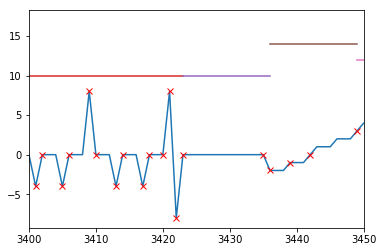

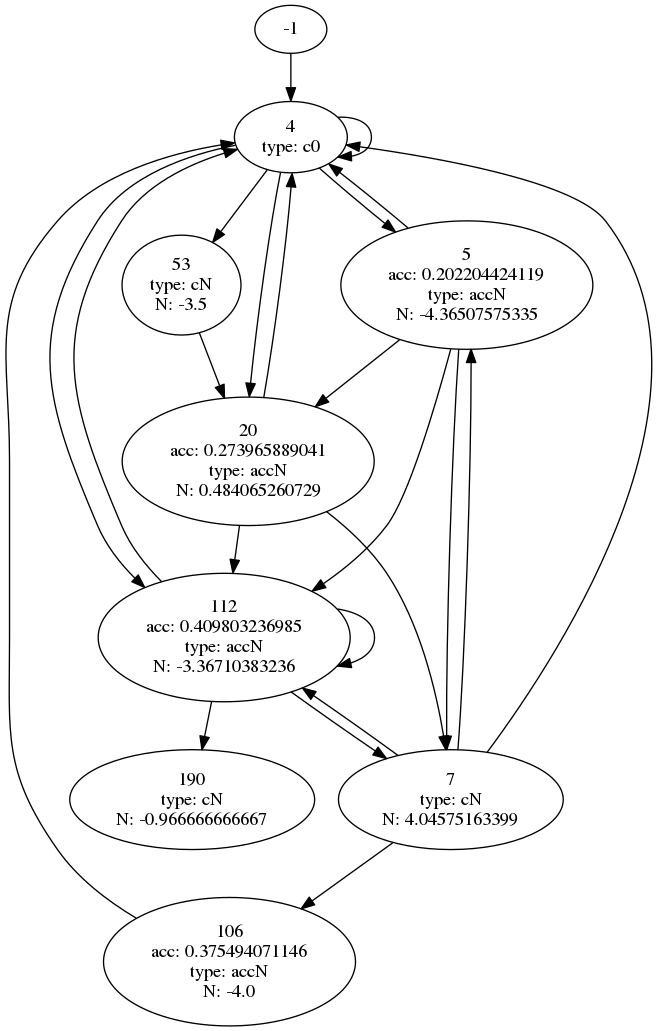

In [5]:
G = nx.MultiDiGraph()
to_add = {}

counts = {}
for tgt,srcs in entries_from.items():
    if tgt not in counts:
        counts[tgt] = 0
        
    for src,times in srcs.items():
        counts[tgt] += len(times)
print counts
for tgt,srcs in entries_from.items():
    if counts[tgt] > 0:
        G.add_node(tgt,label=str(tgt))
        # Let's learn about tgt
        mtype = path[tgt][1][2][0]
        mparams = merged_params[tgt]
        params = {"type": mtype}
        if mtype == 'c0':
            pass
        elif mtype == 'cP':
            pass
        elif mtype == 'cN':
            params["N"] = mparams[0]
        elif mtype == 'acc0':
            params["acc"] = mparams[0]
        elif mtype == 'accP':
            params["acc"] = mparams[0]
        elif mtype == 'accN':
            params["N"] = mparams[0]
            params["acc"] = mparams[1]
        for k,v in params.items():
            G.node[tgt]["label"] = (G.node[tgt]["label"] + "\n" + "{}: {}".format(k,v))
        print tgt,params
        for src,times in srcs.items():
            for t in times:
                if (src,tgt) not in to_add:
                    to_add[(src,tgt)] = []
                to_add[(src,tgt)].append('{}'.format(t))
                #G.add_edge(src,tgt,label=str(t))
for e in sorted(to_add):
    print e[0],e[1],':',' '.join(to_add[e]),':',len(to_add[e])
    G.add_edge(e[0],e[1])

G.add_node(-1)
G.add_edge(-1, unions[0])

m2i = {m:i for i,m in enumerate(merged)}
print m2i
plt.plot(velocities)
plt.plot(np.array(all_times),velocities[np.array(all_times,dtype='int')],'rx')
for u in sorted(unions):
    t0 = all_times[path[u][1][0]]
    t1 = all_times[path[u][1][1]]
    u_ = m2i.get(unions[u],u)
    plt.plot([t0,t1],[u_+10,u_+10])#,colors[u])
        
plt.xlim((3400, 3450))
plt.show()


nxpd.draw(G, show='ipynb')

In [6]:

def button_changes(button_masks):
    last_mask = 0
    mask_times = {}
    for t, b in enumerate(button_masks):
        b_ = int(b)
        buttons = []
        for ii,c in enumerate(list('RLDUTSBA')):
            if b_ & (1 << (7-ii)):
                buttons.append(c)
        l_ = int(last_mask)
        last_buttons = []
        for ii,c in enumerate(list('RLDUTSBA')):
            if l_ & (1 << (7-ii)):
                last_buttons.append(c)
        mask_times[t] = (tuple(last_buttons),tuple(buttons))
        last_mask = b
    
    return mask_times


button_change_times = button_changes(inputVec)
print button_change_times[1094]
for t in sorted(button_change_times):
    pass #print t, button_change_times[t]

((), ('A',))


In [7]:
def sign(num):
    if num < 0:
        return -1
    if num > 0:
        return 1
    return 0

def button_preds(button_pairs):
    here_i = set()
    for i,bp in button_pairs.items():
        bp0 = set(bp[0])
        bp1 = set(bp[1])
        released_i = bp0 - bp1
        pressed_i = bp1 - bp0
        held_i = bp1
        for ri in released_i:
            here_i.add(("release",ri))
        for ri in pressed_i:
            here_i.add(("press",ri))
        for ri in held_i:
            here_i.add(("hold",ri))
    return list(here_i)

def collision_preds(coll_pairs):
    here_i = set()
    for i,bp in coll_pairs.items():
        bp0 = set(bp[0])
        bp1 = set(bp[1])
        released_i = bp0 - bp1
        pressed_i = bp1 - bp0
        held_i = bp[1]
        for ri in released_i:
            here_i.add(("col_stop",ri))
        for ri in pressed_i:
            here_i.add(("col_start",ri))
        for ri in held_i:
            here_i.add(("col",ri))
    return list(here_i)

In [8]:
base_preds = [set()]*len(velocities)
for t in range(0,len(velocities)):
    # TODO: button lag variables
    psi = ({i: button_change_times[start_time+t+i]
            for i in range(-1, 1)},
           # TODO: collision lag variables?
            {i:(collisions.get(start_time+t+(i-1),set()),
                 collisions.get(start_time+t+(i),set()))
             for i in range(-1, 1)},
            (velocities[t-1],velocities[t-0])
          )
    buttons_i = psi[0]
    collisions_i = psi[1]
    here_i = button_preds(buttons_i) + collision_preds(collisions_i)
   
    vel0,vel1 = psi[2]
    if vel0 < vel1:
        here_i.append(("acc",1))
    if vel0 > vel1:
        here_i.append(("acc",-1))
    if vel0 == vel1:
        here_i.append(("acc",0))
    if vel1 < 0:
        here_i.append(("vel",-1))
    if vel1 > 0:
        here_i.append(("vel",1))
    if vel1 == 0:
        here_i.append(("vel",0))
    if vel0 < 0 and vel1 > 0:
        here_i.append(("zc",1))
    if vel0 > 0 and vel1 < 0:
        here_i.append(("zc",-1))
    if vel0 < 0 and vel1 == 0:
        here_i.append(("zin",1))
    if vel0 > 0 and vel1 == 0:
        here_i.append(("zin",-1))
    if vel0 == 0 and vel1 < 0:
        here_i.append(("zout",-1))
    if vel0 == 0 and vel1 > 0:
        here_i.append(("zout",1))
    #cur_mode = X
    # TODO: touched global min/max of velocity for current mode
    #mode_max = max(velocities_in_cur_mode)
    #mode_min = min(velocities_in_cur_mode)
    #if vel1 == mode_max and vel0 != mode_max:
    #  touched max
    #if vel1 == mode_min and vel0 != mode_min:
    #  touched min
    #if vel1 == mode_max:
    #  in min
    #if vel1 == mode_min:
    #  in max
    base_preds[t] = set(here_i)



In [9]:
def intervals_any_contains(intervals, t):
    if intervals is None:
        return True
    for (s,e) in intervals:
        if s <= t <= e:
            return True
    return False

def intervals_summed_length(intervals):
    return sum([(e-s)+1 for (s,e) in intervals])

def count_events(preds,intervals):
    all_counts = {}
    counts_by_time = {}
    for t,ps in enumerate(preds):
        if not intervals_any_contains(intervals, t): continue
        counts_by_time[t] = {}
        for p in ps:
            if p[0] in ["press","release","hold"] or "col" in p[0]:
                all_counts[p] = all_counts.get(p,0)+1./3.
                counts_by_time[t][p] = counts_by_time[t].get(p,0)+1./3.
            else:
                all_counts[p] = all_counts.get(p,0)+1
                counts_by_time[t][p] = counts_by_time[t].get(p,0)+1
        if t in transitions:
            tr = transitions[t]
            key = ("tr",tr)
            all_counts[key] = all_counts.get(key,0)+1
            counts_by_time[t][key] = counts_by_time[t].get(key,0)+1
            (_,dest) = tr
            keystar = ("tr",("*",dest))
            all_counts[keystar] = all_counts.get(keystar,0)+1
            counts_by_time[t][keystar] = counts_by_time[t].get(keystar,0)+1
    return all_counts, counts_by_time

def count_coevents(preds,intervals):
    all_counts = {}
    counts_by_time = {}
    for t,ps in enumerate(preds):
        if not intervals_any_contains(intervals, t): continue
        counts_by_time[t] = {}
        for p1 in ps:
            for p2 in ps:
                p = (p1,p2)
                
                if p1[0] in ["press","release","hold"] or p2[0] in ["press","release","hold"] :
                    all_counts[p] = all_counts.get(p,0)+1./3.
                    counts_by_time[t][p] = counts_by_time[t].get(p,0)+1./3.
                else:
                    all_counts[p] = all_counts.get(p,0)+1
                    counts_by_time[t][p] = counts_by_time[t].get(p,0)+1
                #all_counts[p] = all_counts.get(p,0)+1
                #counts_by_time[t][p] = counts_by_time[t].get(p,0)+1
        if t in transitions:
            for p1 in ps:
                tr = transitions[t]
                key = (("tr",tr),p1)
                if p1[0] in ["press","release","hold"] or "col" in p1[0]:
                    all_counts[key] = all_counts.get(key,0)+1./3.
                    counts_by_time[t][key] = counts_by_time[t].get(key,0)+1./3.
                    (_,dest) = tr
                    keystar = (("tr",("*",dest)),p1)
                    all_counts[keystar] = all_counts.get(keystar,0)+1./3.
                    counts_by_time[t][keystar] = counts_by_time[t].get(keystar,0)+2./3.
                else:
                    all_counts[key] = all_counts.get(key,0)+1
                    counts_by_time[t][key] = counts_by_time[t].get(key,0)+1
                    (_,dest) = tr
                    keystar = (("tr",("*",dest)),p1)
                    all_counts[keystar] = all_counts.get(keystar,0)+1
                    counts_by_time[t][keystar] = counts_by_time[t].get(keystar,0)+1
    return all_counts, counts_by_time

In [10]:
all_counts, counts_by_time = count_events(base_preds,None)
all_cocounts, cocounts_by_time = count_coevents(base_preds,None)

In [11]:
# Let's figure out which tiles block movement on which sides!
# co-occurrence of (col, BLAH) and acc0 for each BLAH.
# cluster together tiles which block on a given side (for now, all those with co-occurrence over threshold)
# then add new preds!

def cond_prob(e1s, e2, all_counts, counts_by_time):
    p2 = all_counts[e2]/float(len(counts_by_time))
    count12 = 0
    for t,cs in counts_by_time.items():
        any_e1_present = False
        for e1 in e1s:
            if e1 in cs:
                any_e1_present = True
                break
        if any_e1_present and (e2 in cs):
            count12 += 1
    p12 = count12 / float(len(counts_by_time))
    return p12 / p2

block_chance = {}
for thing,count in all_counts.items():
    # TODO: note "colliding on right with something" -> "vely=0" is not that sensible.
    #  need a notion of acc,vel,zin,zout and _other axis_ acc,vel,zin,zout.
    if thing[0] != "col" or thing[-1] != 0:
        continue
    block_chance[thing[1]] = cond_prob([("vel",0),("acc",0)], 
                                        ("col", thing[1], 0),
                                        all_counts,
                                        counts_by_time)

block_chance_unify_threshold = 0.8

merged_by_side = {}
for side in ["bottom","right","left","top"]:
    # Let's pretend colliding with sprites is the same as colliding with tiles?  Maybe needed for moving platforms?
    blockings = filter(lambda (col,prob):(col[1] == side and 
                                          prob > block_chance_unify_threshold),
                       block_chance.items())
    merged_by_side[side] = set()
    for bcol,bprob in blockings:
        merged_by_side[side].add(bcol)
    merged_by_side[side] = sets.ImmutableSet(merged_by_side[side])
        
    
#color_tiles = pickle.load(open('tile2colorized.pkl'))
for side,bcols in merged_by_side.items():
    print "----\n{}\n----".format(side)
    for bc in bcols:
        print block_chance[bc],bc[0]

----
top
----
----
right
----
----
left
----
----
bottom
----


In [12]:
# Let's add new preds now!
extended_preds = [set() for i in range(0,len(base_preds))]
for t,pset in enumerate(base_preds):
    for side,equiv in merged_by_side.items():
        for pred in pset:
            extended_preds[t].add(pred)
            if pred[0] == "col" and pred[1] in equiv:
                extended_preds[t].add(("col", (("solid", equiv), side), pred[2]))
            if pred[0] == "col_start" and pred[1] in equiv:
                extended_preds[t].add(("col_start", (("solid", equiv), side), pred[2]))
            if pred[0] == "col_stop" and pred[1] in equiv:
                extended_preds[t].add(("col_stop", (("solid", equiv), side), pred[2]))

# HACK: Drop distinctions between lag variables for now.  They were important before!
for t,pset in enumerate(extended_preds):
    extended_preds[t] = set(map(lambda p:(p[0], p[1], 0) if (p[0] == "col" or p[0] == "col_start" or 
                                                             p[0] == "col_stop" or p[0] == "press" or 
                                                             p[0] == "release" or p[0] == "hold") else p,
                                pset))

all_counts,counts_by_time = count_events(extended_preds,None)
all_cocounts,cocounts_by_time = count_coevents(extended_preds,None)

all_counts,counts_by_time

({('acc', -1): 460,
  ('acc', 0): 2516,
  ('acc', 1): 795,
  ('col', ((1, 2, 3, 4), 'bottom'), 0): 41.666666666666686,
  ('col', ((1, 2, 12, 13), 'bottom'), 0): 82.66666666666657,
  ('col', ((8, 5, 6, 7), 'bottom'), 0): 65.33333333333348,
  ('col', ((9, 2, 11, 10), 'bottom'), 0): 108.99999999999953,
  ('col', ((16, 5, 14, 15), 'bottom'), 0): 470.9999999999907,
  ('col', ((17, 18, 19, 20), 'bottom'), 0): 3.666666666666667,
  ('col', ((24, 21, 22, 23), 'bottom'), 0): 23.999999999999982,
  ('col', ((25, 3, 4, 29), 'bottom'), 0): 72.66666666666671,
  ('col', ((25, 26, 27, 28), 'bottom'), 0): 50.333333333333414,
  ('col', ((25, 29, 30, 31), 'bottom'), 0): 22.33333333333332,
  ('col', ((32, 33, 34, 22), 'bottom'), 0): 279.0000000000016,
  ('col', ((35, 36, 38, 39), 'right'), 0): 3.0,
  ('col', ((35, 36, 38, 39), 'top'), 0): 1.0,
  ('col', ((36, 0, 'tile'), 'bottom'), 0): 1202.000000000006,
  ('col', ((36, 0, 'tile'), 'internal'), 0): 1204.3333333333387,
  ('col', ((36, 0, 'tile'), 'left'), 0

In [13]:
#TODO: update to support intervals?

def count_conditional_events(preds,condition):
    all_counts = {}
    counts_by_time = {}
    for t,ps in enumerate(preds):
        counts_by_time[t] = {}
        if condition in ps:
            for p in ps:
                all_counts[p] = all_counts.get(p,0)+1
                counts_by_time[t][p] = counts_by_time[t].get(p,0)+1
            if t in transitions:
                tr = transitions[t]
                key = ("tr",tr)
                all_counts[key] = all_counts.get(key,0)+1
                counts_by_time[t][key] = counts_by_time[t].get(key,0)+1
                (_,dest) = tr
                keystar = ("tr",("*",dest))
                all_counts[keystar] = all_counts.get(keystar,0)+1
                counts_by_time[t][keystar] = counts_by_time[t].get(keystar,0)+1
    return all_counts

def count_joint_events(preds,conditions):
    count = 0
    for t,ps in enumerate(preds):
        trans = transitions.get(t,-1)
        is_good = True
        for condition in conditions:
            if condition not in ps and condition != trans:
                is_good = False
                break
        if is_good:
            count += 1
    return count
    
def count_conditional_coevents(preds,condition):
    all_counts = {}
    counts_by_time = {}
    for t,ps in enumerate(preds):
        counts_by_time[t] = {}
        if condition in ps:
            for p1 in ps:
                for p2 in ps:
                    p = (p1,p2)
                    all_counts[p] = all_counts.get(p,0)+1
                    counts_by_time[t][p] = counts_by_time[t].get(p,0)+1
            if t in transitions:
                for p1 in ps:
                    tr = transitions[t]
                    key = (("tr",tr),p1)
                    all_counts[key] = all_counts.get(key,0)+1
                    counts_by_time[t][key] = counts_by_time[t].get(key,0)+1
                    (_,dest) = tr
                    keystar = (("tr",("*",dest)),p1)
                    all_counts[keystar] = all_counts.get(keystar,0)+1
                    counts_by_time[t][keystar] = counts_by_time[t].get(keystar,0)+1
    return all_counts

In [14]:
mode_periods = {}

for t in range(0,len(path)):
    cur = unions[t]
    start = all_times[path[t][1][0]]
    if t + 1 < len(path):
        end = all_times[path[t+1][1][0]]
    else:
        end = len(velocities)
    if cur not in mode_periods:
        mode_periods[cur] = []
    mode_periods[cur].append((start,end))

transition_leadin_intervals = {}

for src in merged:
    for tgt in merged:
        if src == tgt: continue
        intervals = [(s,e)
                      for (s,e) in mode_periods[src] 
                      if e in transitions and transitions[e][1] == tgt]
        transition_leadin_intervals[(src,tgt)] = intervals

In [15]:
##### tile2colorized = pickle.load(open('tile2colorized.pkl'))
id2colorized = pickle.load(open('id2sprites.pkl'))[1]

inv_len = 1.0/float(len(track))
npmis = {}
pmis = {}

for m1 in merged:
    for m2 in merged:
        if m1 == m2: continue
        transition = (m1,m2)
        intervals = transition_leadin_intervals[transition]
        intvl_len = intervals_summed_length(intervals)
        if intvl_len == 0: continue
        tr_counts,_by_time = count_events(extended_preds, intervals)
        tr_cocounts,_by_time = count_coevents(extended_preds, intervals)
        tr_inv_len = 1.0/float(intvl_len)
        for pred in tr_counts:
            if pred != transition:
                p1 = tr_counts[pred]*tr_inv_len
                p2 = tr_counts[("tr",transition)]*tr_inv_len
                cooccur = (("tr",transition),pred)
                if cooccur in tr_cocounts:
                    p12 = tr_cocounts[cooccur]*tr_inv_len
                else:
                    p12 = 0.0
                if transition not in npmis:
                    npmis[transition] = {}
                if p12/(p1*p2) != 0.0:
                    pmi = np.log(p12/(p1*p2))
                    npmi = pmi/-np.log(p12)
                    pmis[(transition,pred)] = pmi
                    npmis[transition][pred] = npmi
                else:
                    npmis[transition][pred] = -1.0

for t in sorted(npmis):
    for e1,pmi in reversed(sorted(npmis[t].items(), lambda a,b:sign(b[1] - a[1]))):
        if pmi > 0.4:
#             conditioned_px = count_conditional_events(preds,e1)
#             conditioned_pxy = count_conditional_coevents(preds,e1)
            print t, e1, pmi
#             if False:
#                 for pmi2 in reversed(sorted(npmis[t])):
#                     if pmi != pmi2:
#                         e2 =  npmis[t][pmi2]
#                         pmi_t_e1 = pmis[(t,e1)]


#                         p_t_e2_I_e1 = conditioned_pxy.get((("tr",t),e2),0)/float(all_counts[e1])
#                         p_t_I_e1 = conditioned_px.get(("tr",t),0)/float(all_counts[e1])
#                         p_e2_I_e1 = conditioned_px.get(e2,0)/float(all_counts[e1])
#                         if p_t_I_e1 == 0.0 or p_e2_I_e1 == 0.0:
#                             p_t_e2_I_e1 = 0.0
#                             p_t_I_e1 = 1
#                             p_e2_I_e1 = 1

#                         pmi_t_e1_e2 = (pmi_t_e1 + np.log(p_t_e2_I_e1/(p_t_I_e1*p_e2_I_e1)))

#                         p_t_e1_e2 = count_joint_events(preds,[e1,e2,t])*inv_len
#                         if p_t_e1_e2 == 0.0:
#                             npmi_t_e1_e2 = -1.0
#                         else:
#                             npmi_t_e1_e2 = pmi_t_e1_e2/-np.log(p_t_e1_e2)
#                         if npmi_t_e1_e2 > 0.0:
#                             print 'pmi({};{},{})'.format(t,e1,e2), npmi_t_e1_e2, pmi,pmi2
#                             if 'col' in e2 and 'tile' in e2[1][0]:
#                                 plt.imshow(tile2colorized[e2[1][0][:2]]/255.)
#                                 plt.show()
    print ''

(4, 5) ('hold', 'A', 0) 0.511352959517
(4, 5) ('press', 'A', 0) 0.707897217758
(4, 5) ('acc', -1) 0.731613863324
(4, 5) ('vel', -1) 1.0
(4, 5) ('zout', -1) 1.0

(4, 20) ('zout', 1) 1.0
(4, 20) ('acc', 1) 1.0
(4, 20) ('vel', 1) 1.0

(4, 53) ('hold', 'A', 0) 0.442656682993
(4, 53) ('col_start', ((54, 0, 'tile'), 'internal'), 0) 0.500408313934
(4, 53) ('press', 'A', 0) 0.71591900285
(4, 53) ('acc', -1) 0.782251637438
(4, 53) ('vel', -1) 1.0
(4, 53) ('zout', -1) 1.0

(4, 112) ('zout', -1) 1.0
(4, 112) ('vel', -1) 1.0
(4, 112) ('acc', -1) 1.0

(5, 4) ('col', ((180, 1, 'tile'), 'top'), 0) 0.408590795736
(5, 4) ('col', ((181, 1, 'tile'), 'top'), 0) 0.408590795736
(5, 4) ('col', ((25, 3, 4, 29), 'bottom'), 0) 0.422045639373
(5, 4) ('col', ((84, 3, 'tile'), 'top'), 0) 0.440951347081
(5, 4) ('col_stop', ((96, 0, 'tile'), 'top'), 0) 0.451162213978
(5, 4) ('col', ((24, 21, 22, 23), 'bottom'), 0) 0.451162213978
(5, 4) ('col_stop', ((49, 0, 'tile'), 'right'), 0) 0.451162213978
(5, 4) ('col_start', (

In [16]:
# Joe's output version

relevance_threshold = 0.6
universality_threshold = 0.9
negation_threshold = -1.0

# TODO: more selective prioritizing of buttons (press/release over hold) vs 
# collisions vs qualitative stuff.

all_edges = {}
for tr,pred_npmis in npmis.items():# + paired_npmis.items():
    cond_probs = {k: cond_prob([k], ("tr",tr), all_counts, counts_by_time) 
                  for k in pred_npmis.keys()}
    relevants = {k: npmi for (k,npmi) in pred_npmis.items() if npmi >= relevance_threshold}
    negations = set() #{k: npmi for (k,npmi) in pred_npmis.items() if npmi <= negation_threshold}
    conjuncts = set(filter(lambda k:cond_probs[k] >= universality_threshold, relevants.keys()))
    disjuncts = set() # set(filter(lambda k:cond_probs[k] < universality_threshold and k not in conjuncts, relevants.keys()))
    # if press (btn) >= hold (btn)
        
    all_edges[tr] = conjuncts
    print "-------\nTransition:",tr
    #print "-----\nCond Probs:"
    #print "\n".join(map(str,sorted(cond_probs.items(), lambda a,b:sign(b[1]-a[1]))))
    #print "-----\nNPMIs:"
    #print "\n".join(map(str,sorted(pred_npmis.items(), lambda a,b:sign(b[1]-a[1]))))
    #print "-----\nRelevant:\n","\n".join(map(str,relevants.items()))
    print "-----\nConjuncts:\n"," & ".join(map(str,conjuncts))
    print "-----\nDisjuncts:\n"," | ".join(map(str,disjuncts))
    #print "-----\nNegations:\n"," & ".join(map(lambda k:"~" + str(k),negations))

print "dupes?"
for m1 in merged:
    seen_guards = set()
    for m2 in merged:
        key = (m1,m2)
        if key in all_edges:
            if all_edges[key] in seen_guards:
                print "Duplicate",m1,m2,all_edges[key]
            seen_guards.add(sets.ImmutableSet(all_edges[key]))

-------
Transition: (5, 4)
-----
Conjuncts:
('vel', 0)
-----
Disjuncts:

-------
Transition: (20, 4)
-----
Conjuncts:
('acc', -1)
-----
Disjuncts:

-------
Transition: (53, 20)
-----
Conjuncts:

-----
Disjuncts:

-------
Transition: (106, 4)
-----
Conjuncts:
('col', ((181, 1, 'tile'), 'top'), 0) & ('col_stop', ((36, 0, 'tile'), 'left'), 0) & ('col_stop', ((36, 0, 'tile'), 'right'), 0) & ('col_start', ((181, 1, 'tile'), 'top'), 0) & ('col_stop', ((36, 0, 'tile'), 'internal'), 0) & ('col', ((55, 0, 'tile'), 'bottom'), 0) & ('col_start', ((54, 0, 'tile'), 'bottom'), 0) & ('col', ((180, 1, 'tile'), 'top'), 0) & ('acc', -1) & ('col_start', ((180, 1, 'tile'), 'top'), 0) & ('col', ((54, 0, 'tile'), 'bottom'), 0) & ('col_start', ((55, 0, 'tile'), 'bottom'), 0)
-----
Disjuncts:

-------
Transition: (5, 112)
-----
Conjuncts:
('release', 'R', 0)
-----
Disjuncts:

-------
Transition: (112, 4)
-----
Conjuncts:
('col', ((181, 1, 'tile'), 'top'), 0) & ('acc', -1) & ('col_start', ((180, 1, 'tile'), 't

In [19]:
#Adam's output version

import operator
relevance_threshold = 0.5
universality_threshold = 0.7
negation_threshold = -1.0
for tr in sorted(npmis):# + paired_npmis.items():
    if hasattr(tr, "__len__"):
        if tr[0] != tr[1]:
            pred_npmis = npmis[tr]
            
            universals = {k: npmi for (k,npmi) in pred_npmis.items() if npmi >= universality_threshold}
            relevants = {k: npmi for (k,npmi) in pred_npmis.items() if npmi >= relevance_threshold and k not in universals}
            
            negations = {k: npmi for (k,npmi) in pred_npmis.items() if npmi <= negation_threshold}
            print "\n"
            print "-------\nTransition:",tr
            print "-----\nUniversals:\n","\n".join(map(str,reversed(sorted(universals.items(), key=operator.itemgetter(1)))))
            print "-----\nRelevant:\n","\n".join(map(str,reversed(sorted(relevants.items(), key=operator.itemgetter(1)))))
            #print "-----\nNegations:\n"," & ".join(map(lambda k:"~" + str(k),negations))



-------
Transition: (4, 5)
-----
Universals:
(('vel', -1), 1.0)
(('zout', -1), 1.0)
(('acc', -1), 0.73161386332444034)
(('press', 'A', 0), 0.70789721775823389)
-----
Relevant:
(('hold', 'A', 0), 0.51135295951722237)


-------
Transition: (4, 20)
-----
Universals:
(('vel', 1), 1.0000000000000002)
(('zout', 1), 1.0000000000000002)
(('acc', 1), 1.0000000000000002)
-----
Relevant:



-------
Transition: (4, 53)
-----
Universals:
(('vel', -1), 1.0)
(('zout', -1), 1.0)
(('acc', -1), 0.7822516374383176)
(('press', 'A', 0), 0.71591900285038945)
-----
Relevant:
(('col_start', ((54, 0, 'tile'), 'internal'), 0), 0.50040831393377516)


-------
Transition: (4, 112)
-----
Universals:
(('vel', -1), 0.99999999999999978)
(('zout', -1), 0.99999999999999978)
(('acc', -1), 0.99999999999999978)
-----
Relevant:



-------
Transition: (5, 4)
-----
Universals:
(('zin', -1), 0.94796440976147167)
-----
Relevant:
(('col_start', ((180, 1, 'tile'), 'top'), 0), 0.66553030454457729)
(('col_start', ((181, 1, 'tile'

In [18]:
pickle.dump((npmis, entries, entries_from, extended_preds, modes, merged, unions, track, inputVec, all_times), 
            open("edges.pkl",'wb'))